# Neural Style Transfer_Creating Art with Deep Learning

### What is Neural style transfer
Neural style transfer is a machine learning technique that combines the content of one image with the style of another image to create a new, synthesized image. The content of an image refers to the objects and structures depicted in the image, while the style refers to the texture, color, and other visual elements that contribute to the overall aesthetic of the image. Neural style transfer algorithms use deep learning techniques to analyze and extract the content and style features of the input images and then combine them to create a new image that captures the content of one image and the style of the other. This technique has been used to create a variety of artistic effects, such as transferring the style of a famous painting onto a photograph or creating a new image that blends the styles of multiple different images.

Aim:

>>> The project could be to develop a neural style transfer model that can transform images into a variety of different artistic styles, using techniques such as convolutional neural networks and transfer learning. This could be a fun and interactive way for users to experiment with different artistic styles and create unique images.


This code imports a number of libraries and modules that are needed for the following code. The libraries imported include TensorFlow, Keras, matplotlib, PIL, and numpy. These libraries are used for tasks such as image processing, deep learning, and data manipulation. Additionally, specific modules and classes are imported from these libraries, such as the vgg19 module from Keras, and the img_to_array function from Keras' image preprocessing module. The comments starting with # are just describing what each import is used for.

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications import vgg19
from tensorflow.python.keras import models 
import functools
import IPython.display
import numpy as np # linear algebra
from tensorflow.keras.preprocessing.image import img_to_array

This code imports the os library and uses the os.walk function to recursively list all files in the directory '/kaggle/input'. The os.walk function generates the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames). The comment above the code explain the purpose of this code, which is to list all files under the input directory.

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

This code assigns the paths of two image files to two variables, content_path and style_path. The paths are specific file locations on the local computer's file system. The content_path variable is assigned the path of an image file named '2_15.png' located in the folder 'data/content-images/' and the style_path variable is assigned the path of an image file named 'Vincent Van Gogh - The Starry Night.jpg' located in the folder 'data/style-images/'. These variables will be used later in the code to read these image files and perform some operation on them.

In [3]:
content_path='C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/2_23.png'
style_path = r'C:\Users\JABARI 4 PC\Desktop\Project\Final Project OSAILAH\data\style-images\Vincent Van Gogh - The Starry Night.jpg'

* This code defines two functions, load_image and load_file, that are used to load the image files specified by the content_path and style_path variables defined earlier.
* The load_image function uses the expensive_computation function to load the image, resize it, and convert it to a numpy array. The functools.lru_cache(maxsize=None) decorator is used to cache the result of the expensive_computation() function to speed up the subsequent calls to the same function. The function first checks the cache for the image, if it exists, it returns the cached image. If it doesn't exist, it loads the image and stores the image in the cache.
* The load_file function is similar to load_image but does not use cache. It loads the image, resize it, and convert it to a numpy array.
* Both function load_image and load_file are called with the content_path and style_path variables to load the image files and store the resulting numpy arrays in the content and style variables.

In [4]:
# Define function to perform expensive computation
@functools.lru_cache(maxsize=None)
def expensive_computation(image_path):
    # Load image
    image =  Image.open(image_path)
    max_dim=512
    factor=max_dim/max(image.size)
    image=image.resize((round(image.size[0]*factor),round(image.size[1]*factor)),Image.ANTIALIAS)
    im_array = img_to_array(image)
    im_array = np.expand_dims(im_array,axis=0) #adding extra axis to the array as to generate a 
                                               #batch of single image 
    return im_array

# Define function to load image
def load_image(image_path):
    # Check cache for image
    result = expensive_computation(image_path)
    if result is not None:
        return result
    
    # If image is not in cache, load it and store it in the cache
    im_array = expensive_computation(image_path)
    
    # Store image in cache
    expensive_computation(image_path, im_array)
    
    return im_array

# Later in your code
content = load_image(content_path)
style = load_image(style_path)


# Define function to load images and return numpy array
def load_file(image_path):
    image =  Image.open(image_path)
    max_dim=512
    factor=max_dim/max(image.size)
    image=image.resize((round(image.size[0]*factor),round(image.size[1]*factor)),Image.ANTIALIAS)
    im_array = img_to_array(image)
    im_array = np.expand_dims(im_array,axis=0) #adding extra axis to the array as to generate a 
                                               #batch of single image 
    
    return im_array

content = load_file(content_path)
style = load_file(style_path)

This code defines a function named show_im() that takes in an image and an optional title as inputs, and plots the image using matplotlib's imshow() function. The function first uses the np.squeeze() function to remove an extra dimension from the input image array, which is necessary to display the image correctly. Then the function uses the imshow() function to display the image. The title variable is passed as the title of the image if it is not None. The function is used to display the image using matplotlib.

In [5]:
#%%
# Define function to plot image
def show_im(img,title=None):
    img=np.squeeze(img,axis=0) #squeeze array to drop batch axis
    plt.imshow(np.uint8(img))
    if title is None:
        pass
    else:
        plt.title(title)
    plt.imshow(np.uint8(img))

* This code is trying to open an image file located at the path specified by the style_path variable, using the PIL (Python Imaging Library) library's Image.open() function. This function attempts to open the specified image file, and returns an Image object which can be used for further processing.
* The code also uses a try-except block to handle the case when the image file is not found at the specified path. If the file is not found, a FileNotFoundError will be raised and the except block will execute, printing a message indicating that the file was not found. The print(f"File {style_path} not found") statement is used to print the message.

In [6]:
#%%
try:
    image =  Image.open(style_path)
except FileNotFoundError:
    print(f"File {style_path} not found")

* This code is plotting two images, one is the content image and the other is the style image. It first creates a new figure with a size of (10,10) using matplotlib's figure() function. Then it loads the content image and the style image using the load_file() function with the content_path and style_path variables as the arguments.
* Then it uses the subplot() function to create a subplot with 1 row, 2 columns and the first subplot is the content image, and the second subplot is the style image. show_im() function is used to display the images and the title of the images is passed as the argument. The plt.show() function is used to display the plot.

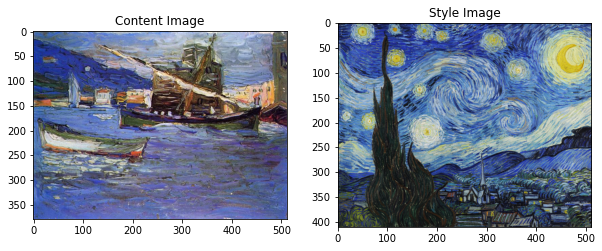

In [7]:
#%%
# Plot Image
plt.figure(figsize=(10,10))
content = load_file(content_path)

style = load_file(style_path)
plt.subplot(1,2,1)
show_im(content,'Content Image')
plt.subplot(1,2,2)
show_im(style,'Style Image')
plt.show()

* This code defines a function named deprocess_img() that takes in a processed image as input, and performs the inverse of the preprocessing step that was applied to the image.
* The function first makes a copy of the input image, and then checks if the image has 4 dimensions by checking the length of the shape of the image. If it has 4 dimensions, it removes the first dimension using the np.squeeze() function. Then, it checks that the remaining dimensions are 3, which is [height, width, channel].
* Then it performs the inverse of the preprocessing step that was applied to the image by adding back the mean values of each channel, which are [103.939, 116.779, 123.68]. And then it converts the image from BGR to RGB channel by reversing the order of the channels.
* Finally, the function clips any values that are less than 0 or greater than 255, and then converts the image to the 'uint8' datatype and returns the deprocessed image.

In [8]:
# Define function to deprocess image
# VGG networks are trained on image with each channel normalized by mean = [103.939, 116.779, 123.68]and with channels BGR.

def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3 #Input dimension must be [1, height, width, channel] or [height, width, channel]
  
  
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1] # converting BGR to RGB channel

  x = np.clip(x, 0, 255).astype('uint8')
  return x

* This code first loads an image using the load_file() function, passing the content_path variable as the input, and assigns it to the image variable. Then it applies the deprocess_img() function to the image variable, to undo any preprocessing that was previously done on the image, and assigns the result to the variable deprocessed_image. And then it makes a copy of the deprocessed_image variable and assigns it to the variable im.
* It also defines a new function img_preprocess() which takes in a path to an image as input, loads the image using the PIL library, resizes the image so that the maximum dimension is 512, converts the image to a numpy array and adds an extra dimension to the array so that it is a batch of a single image. Then it applies the vgg19's preprocess_input() function on the image array to normalize the image and returns the processed image array. This function is used to apply preprocessing on an image before passing it to a VGG network.

In [9]:
image = load_file(content_path)
deprocessed_image = deprocess_img(image)
im = deprocessed_image.copy()

def img_preprocess(image_path):
    image =  Image.open(image_path)
    max_dim=512
    factor=max_dim/max(image.size)
    image=image.resize((round(image.size[0]*factor),round(image.size[1]*factor)),Image.ANTIALIAS)
    im_array = img_to_array(image)
    im_array = np.expand_dims(im_array,axis=0) #adding extra axis to the array as to generate a 
                                               #batch of single image 
    im_array = vgg19.preprocess_input(im_array)
    return im_array

* This code defines two lists: content_layers and style_layers. content_layers list contains the names of the layers of the VGG19 model that are needed to extract the content features from the input image, and style_layers list contains the names of the layers of the VGG19 model that are needed to extract the style features from the input image.
* It then calculates the number of content layers and the number of style layers by using the len() function on the content_layers and style_layers lists, respectively. These variables will be used later in the code to extract features from the input image using the specified layers of the VGG19 model.

In [10]:
# Get necessary layers from vgg19 model
content_layers = ['block5_conv2']
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']
number_content=len(content_layers)
number_style =len(style_layers)

* This code defines a function named get_model() which returns a VGG19 model with pre-trained weights from the ImageNet dataset.
* The function first loads the VGG19 model using the tf.keras.applications.vgg19.VGG19() function, passing include_top=False and weights='imagenet' as arguments to exclude the fully connected layers and to load the pre-trained weights respectively. Then it sets the trainable attribute of the model to False so that the model's weights are not changed during the training process.
* It then creates two lists, content_output and style_output, which contains the output of the VGG19 model for the layers specified in the content_layers and style_layers lists. content_output contains the output of the content layers and style_output contains the output of the style layers.
* Finally, it concatenates the two lists and creates a new model using the tf.keras.Model function by passing the input of the VGG19 model and the concatenated list as the output. This new model will be used to extract the features from the input image for the content and style layers.

In [11]:
# Define function to get vgg19 model with pretrained weights
def get_model():
    
    vgg=tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet')
    vgg.trainable=False
    content_output=[vgg.get_layer(layer).output for layer in content_layers]
    style_output=[vgg.get_layer(layer).output for layer in style_layers]
    model_output= style_output+content_output
    return models.Model(vgg.input,model_output)

* This code loads the VGG19 model with pre-trained weights from the ImageNet dataset and excludes the fully connected layers by passing include_top=False. Then it calls the summary() function on the model which displays a summary of the model's architecture, including the number of layers, the number of parameters in each layer, and the shape of the output of each layer.
* The model.summary() function is a useful tool for understanding the architecture of a deep learning model, and can be helpful in identifying which layers of the model are appropriate for a given task. In this case, it would allow the user to see all the layers of the VGG19 model, along with the number of parameters in each layer, which can help in identifying the layers that will be used to extract the features from the input image.

In [12]:
model=tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet')
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

* This code first calls the get_model() function, which creates a VGG19 model with the specified content and style layers from the previous code.
* Then it calls the summary() function on the model created by the get_model() function. This summary shows the architecture of the model and the number of parameters in each layer, similar to the previous code snippet. However, this summary only shows the layers that are included in the model, which are the layers specified in the content_layers and style_layers lists. This can be useful for understanding which layers of the VGG19 model are being used to extract the features from the input image, and how they are connected to the input and output of the model.

In [13]:
# Model architecture

model=get_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 15,304,768
Trainable params: 0
Non-trainable params: 15,304,768
_________________________________________________________________


* This code defines a function named get_content_loss() that takes in two inputs, noise and target, and calculates the content loss between them. The function uses the TensorFlow library to perform the calculation.
* The content loss is calculated by finding the mean square error between the noise image and the target image. The tf.reduce_mean() function is used to take the mean of the square error between the two images, and the tf.square() function is used to square the difference between the two images. This loss value represents how different the noise image is from the target image in terms of their content.
* This function will be used to calculate the content loss between the generated image and the content image, which will be used to update the generated image so that it has similar content as the content image.

In [14]:
def get_content_loss(noise,target):
    loss = tf.reduce_mean(tf.square(noise-target))
    return loss


* This code defines a function named gram_matrix() that takes in a tensor as input and calculates the gram matrix of the tensor. The gram matrix is a matrix that describes the correlation between different elements of a tensor.
* The function first calculates the number of channels in the input tensor by using the shape attribute of the tensor and selecting the last element. Then it reshapes the input tensor into a 2D matrix by flattening it with the tf.reshape() function, so that each row represents a channel of the tensor.
* Then it calculates the gram matrix of the reshaped tensor by taking the dot product of the matrix with its transpose using the tf.matmul() function. The resulting matrix will have the same number of rows and columns as the number of channels in the input tensor.
* Finally, it divides the gram matrix by the number of elements in the tensor to normalize it. This gram matrix is used to calculate the style loss between the generated image and the style image, which will be used to update the generated image so that it has similar style as the style image.

In [15]:
def gram_matrix(tensor):
    channels=int(tensor.shape[-1])
    vector=tf.reshape(tensor,[-1,channels])
    n=tf.shape(vector)[0]
    gram_matrix=tf.matmul(vector,vector,transpose_a=True)
    return gram_matrix/tf.cast(n,tf.float32)

* This code defines a function named get_style_loss() that takes in two inputs, noise and target, and calculates the style loss between them. The function uses the TensorFlow library to perform the calculation.
* The function first calculates the gram matrix of the noise image by calling the gram_matrix() function and passing the noise image as an input. Then it calculates the mean square error between the gram matrix of the target image and the gram matrix of the noise image using the tf.reduce_mean() and tf.square() functions. The style loss value represents how different the style of the noise image is from the style of the target image.
* This function will be used to calculate the style loss between the generated image and the style image, which will be used to update the generated image so that it has similar style as the style image.

In [16]:
def get_style_loss(noise,target):
    gram_noise=gram_matrix(noise)
    #gram_target=gram_matrix(target)
    loss=tf.reduce_mean(tf.square(target-gram_noise))
    return loss

* This code defines a function named get_features() that takes in a model, a content image path and a style image path as inputs, and returns the features of the content and style images.
* The function first preprocesses the content and style images by calling the img_preprocess() function and passing the paths of the content and style images. Then it pass the preprocessed images through the model, which is the VGG19 model with the specified content and style layers, and it gets the output of the model by calling the model with the preprocessed images as input.
* The function then separates the output of the model into two parts, one part for the content feature and one part for the style feature. The content feature is the output of the layers specified in the content_layers list, and the style feature is the output of the layers specified in the style_layers list. The function returns these two features as a tuple.
* These features will be used to calculate the content and style loss between the generated image and the content and style images, which will be used to update the generated image so that it has similar content and style as the content and style images.

In [17]:
def get_features(model,content_path,style_path):
    content_img=img_preprocess(content_path)
    style_image=img_preprocess(style_path)
    
    content_output=model(content_img)
    style_output=model(style_image)
    
    content_feature = [layer[0] for layer in content_output[number_style:]]
    style_feature = [layer[0] for layer in style_output[:number_style]]
    return content_feature,style_feature

* This code defines a function named compute_loss() that takes in a model, loss weights, an image, gram style features and content features as inputs, and returns the total loss, style loss and content loss of the image.
* The function first separates the loss weights into style weight and content weight, which are user-given parameters that define what percentage of content and/or style will be preserved in the generated image.
* It then pass the image through the model and gets the output of the model. It separates the output of the model into two parts, one part for the noise style features and one part for the noise content features.
* The function then calculates the style loss between the gram style features and the noise style features, and the content loss between the noise content features and the content features. It multiplies the style loss and the content loss by their corresponding weight.
* Finally, it calculates the total loss by adding the style loss and the content loss, and returns the total loss, style loss, and content loss as a tuple.
* This function will be used to calculate the total loss, style loss, and content loss between the generated image and the content and style images, which will be used to update the generated image so that it has similar content and style as the content and style images.

In [18]:
def compute_loss(model, loss_weights,image, gram_style_features, content_features):
    style_weight,content_weight = loss_weights #style weight and content weight are user given parameters
                                               #that define what percentage of content and/or style will be preserved in the generated image
    
    output=model(image)
    content_loss=0
    style_loss=0
    
    noise_style_features = output[:number_style]
    noise_content_feature = output[number_style:]
    
    weight_per_layer = 1.0/float(number_style)
    for a,b in zip(gram_style_features,noise_style_features):
        style_loss+=weight_per_layer*get_style_loss(b[0],a)
        
    
    weight_per_layer =1.0/ float(number_content)
    for a,b in zip(noise_content_feature,content_features):
        content_loss+=weight_per_layer*get_content_loss(a[0],b)
        
    style_loss *= style_weight
    content_loss *= content_weight
    
    total_loss = content_loss + style_loss
    
    
    return total_loss,style_loss,content_loss

* This code defines a function named compute_grads() that takes in a dictionary as input and returns the gradients of the total loss and the total loss, style loss, and content loss.
* The function first creates a GradientTape context using TensorFlow's GradientTape() method, which is used to record the operations for automatic differentiation.
* It then calls the compute_loss() function with the dictionary as input and assigns the returned tuple to the variable all_loss. The total loss is the first element in the tuple.
* The function then calculates the gradients of the total loss with respect to the image in the dictionary by calling the tape.gradient() method and passing in the total loss and the image.
* Finally, it returns the gradients and all_loss as a tuple.
* This function will be used to calculate the gradients of the total loss between the generated image and the content and style images, which will be used to update the generated image so that it has similar content and style as the content and style images.

In [19]:
# Define function to calculate gradient
def compute_grads(dictionary):
    with tf.GradientTape() as tape:
        all_loss=compute_loss(**dictionary)
        
    total_loss=all_loss[0]
    return tape.gradient(total_loss,dictionary['image']),all_loss

* This code is an implementation of Neural Style Transfer, a technique that combines the content of one image with the style of another image using deep learning. The code uses the VGG19 model from the Keras library to extract features from the content and style images, and then uses these features to train a model to generate a new image that combines the content of the content image with the style of the style image.
* The code imports several libraries and modules for tasks such as image processing, deep learning, and data manipulation.

* The code defines several functions, including:
1. load_file(): loads and resizes an image from a given file path and converts it to a numpy array.
2. show_im(): plots an image using matplotlib.
3. expensive_computation(): loads an image, resizes it, and converts it to a numpy array.
4. load_image(): checks the cache for an image, if not found, loads and stores it in the cache.
5. deprocess_img(): performs the inverse of the preprocessing step that normalizes the image's channels and converts it back to RGB format.
6. img_preprocess(): loads, resizes, and normalizes an image for input into the VGG19 model.
7. get_model(): returns a VGG19 model with pretrained weights, with the specified layers for content and style.
8. get_content_loss(): computes the content loss between the generated image and the content image.
9. gram_matrix(): calculates the gram matrix of a given tensor.
10. get_style_loss(): computes the style loss between the generated image and the style image.
11. get_features(): takes the model, content and style images and returns

In [20]:
def run_style_transfer(content_path, style_path, epochs=500, content_weight=1e3, style_weight=1e-2):    
    model=get_model()
    
    for layer in model.layers:
        layer.trainable = False
        
    content_feature,style_feature = get_features(model,content_path,style_path)
    style_gram_matrix=[gram_matrix(feature) for feature in style_feature]
    
    noise = img_preprocess(content_path)
    noise=tf.Variable(noise,dtype=tf.float32)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=5, beta_1=0.99, epsilon=1e-1)
    
    best_loss,best_img=float('inf'),None
    
    loss_weights = (style_weight, content_weight)
    dictionary={'model':model,
              'loss_weights':loss_weights,
              'image':noise,
              'gram_style_features':style_gram_matrix,
              'content_features':content_feature}
    
    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means   
  
    imgs = []
    for i in range(epochs):
        grad,all_loss=compute_grads(dictionary)
        total_loss,style_loss,content_loss=all_loss
        optimizer.apply_gradients([(grad,noise)])
        clipped=tf.clip_by_value(noise,min_vals,max_vals)
        noise.assign(clipped)
        
        if total_loss<best_loss:
            best_loss = total_loss
            best_img = deprocess_img(noise.numpy())
            
         #for visualization   
            
        if i%5==0:
            plot_img = noise.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            IPython.display.clear_output(wait=True)
            IPython.display.display_png(Image.fromarray(plot_img))
            print('Epoch: {}'.format(i))        
            print('Total loss: {:.4e}, ' 
              'style loss: {:.4e}, '
              'content loss: {:.4e}, '.format(total_loss, style_loss, content_loss))
    
    IPython.display.clear_output(wait=True)
    
    
    return best_img,best_loss,imgs

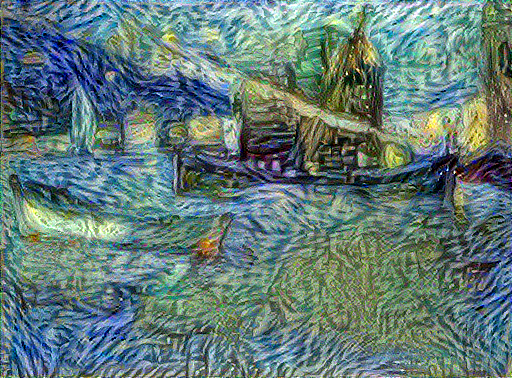

Epoch: 145
Total loss: 2.4663e+06, style loss: 1.4782e+06, content loss: 9.8812e+05, 


In [21]:
best, best_loss,image = run_style_transfer(content_path, style_path, epochs=150, content_weight=1e3, style_weight=1e-2)

* This code is splitting the images in 'content-images' folder into a train set and a test set, and then copying the images in these sets to the corresponding directories 'train' and 'test'. The image filenames are stored in the 'image_filenames' list, and then split into 'train_filenames' and 'test_filenames' using the train_test_split function from the sklearn library.
- The number of images to be used is set to 300, and the percentage of images to be used for the test set is set to 20%. The train and test directories are created if they do not already exist, and the train and test images are then copied to these directories using the shutil library.

import os
import random
import shutil
#import cv2
from sklearn.model_selection import train_test_split

# List all image file names in the 'content-images' folder
image_filenames = [f for f in os.listdir('C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/content-images') if f.endswith('.png')][:300]

# Split the filenames into a training set and a test set
train_filenames, test_filenames = train_test_split(image_filenames, test_size=0.2)

# Set the paths for the content-images and the train/test directories
content_images_path = 'C:\\Users\\JABARI 4 PC\\Desktop\\Project\\Final Project OSAILAH\\data\\content-images'
train_path = 'C:\\Users\\JABARI 4 PC\\Desktop\\Project\\Final Project OSAILAH\\data\\train'
test_path = 'C:\\Users\\JABARI 4 PC\\Desktop\\Project\\Final Project OSAILAH\\data\\test'

# Set the paths for the output directories for the train and test datasets
train_output_dir = "C:\\Users\\JABARI 4 PC\\Desktop\\Project\\Final Project OSAILAH\\data\\output-images\\train"
test_output_dir = "C:\\Users\\JABARI 4 PC\\Desktop\\Project\\Final Project OSAILAH\\data\\output-images\\test"

# Set the number of images to be used
num_images = 300

# Set the percentage of images to be used for the test set
test_size = 0.2

# Create the train and test directories if they do not exist
if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)

# Get the list of all content-images
content_images = os.listdir(content_images_path)[:num_images]

# Shuffle the list of images
random.shuffle(content_images)

# Calculate the number of images in the test set
num_test_images = int(test_size * len(content_images))

# Get the list of images for the test set
test_images = content_images[:num_test_images]

# Get the list of images for the train set
train_images = content_images[num_test_images:]

# Copy the test images to the test directory
for image in test_images:
    shutil.copy2(os.path.join(content_images_path, image), test_path)

# Copy the train images to the train directory
for image in train_images:
    shutil.copy2(os.path.join(content_images_path, image), train_path)

The cod is creating a directory for the training dataset, then applying style transfer using the run_style_transfer() function on each image in the training dataset using a specified style image. The resulting images are saved in the 'train' directory with their original filenames. However, it may take a long time to run, depending on the number of images and the desired number of epochs.

# Style image to use for all images in the training set
style_path = 'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/style-images/Vincent Van Gogh - The Starry Night.jpg'

# Loop over the training filenames and apply style transfer
for content_path in train_filenames:
  content_path = f'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/content-images/{content_path}'
 
  # Save the resulting image to a file in the 'train' directory
  save_path = f'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/output/train/{content_path.split("/")[-1]}'
 
  # Create the directory if it doesn't exist
  directory = os.path.dirname(save_path)
  if not os.path.exists(directory):
    os.makedirs(directory)
    
  best_img, best_loss, _ = run_style_transfer(content_path, style_path, epochs=45)


This code runs the style transfer algorithm on each image in the test and train sets, using the style image specified in the 'style_path' variable. The resulting images are saved to the 'output/train' and 'output/test' directories, respectively.
The algorithm is applied to each image by calling the 'run_style_transfer' function, which takes the path to the content and style images as arguments, as well as the number of training iterations (epochs) and the weights for the content and style losses. The function returns the best-generated image after the training process, the best loss, and the intermediate images generated during the training process.
It also creates the output directory if it does not exist and saves the output images in that directory with the same name as the original image.


# Style image to use for all images in the test set
style_path = 'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/style-images//Vincent Van Gogh - The Starry Night.jpg'

# Loop over the test filenames and apply style transfer
for content_path in test_filenames:
  content_path = f'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/data/content-images/{content_path}'
  # Save the resulting image to a file in the 'test' directory
  save_path = f'C:/Users/JABARI 4 PC/Desktop/Project/Final Project OSAILAH/output/test/{content_path.split("/")[-1]}'
  
  # Create the directory if it doesn't exist
  directory = os.path.dirname(save_path)
  if not os.path.exists(directory):
    os.makedirs(directory)
    
  best_img, best_loss, _ = run_style_transfer(content_path, style_path, epochs=45)